## The task is to create the text classification model that categorize the movie reviews as negative or positive.

Data source: http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Checking the missing data**

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Removing reviews that are empty or below 3 characters**

In [5]:
df = df.dropna()

In [6]:
df = df[df['review'].apply(len) > 3]

**Checking value counts per label**

In [7]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

**Spliting the data into features and a label and then performing a train/test split**

In [8]:
y = df['label']
X = df['review']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Creating a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a Multinomial Naive Bayes supervised learning model**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [11]:
from sklearn.pipeline import Pipeline
pipeline_model = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('nbayes_model',MultinomialNB())])

In [12]:
pipeline_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbayes_model', MultinomialNB())])

**Creating a classification report and plot a confusion matrix based on the results of PipeLine.**

In [13]:
from sklearn.metrics import plot_confusion_matrix,classification_report
y_hat = pipeline_model.predict(X_test)

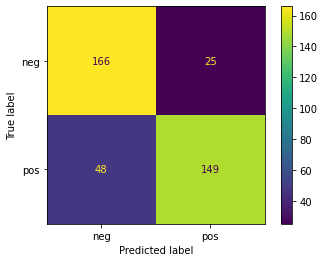

In [14]:
plot_confusion_matrix(pipeline_model,X_test,y_test);

In [15]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



**Thank you**